In [8]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%matplotlib inline

## Data Points

Generate some random data points for the algorithm.

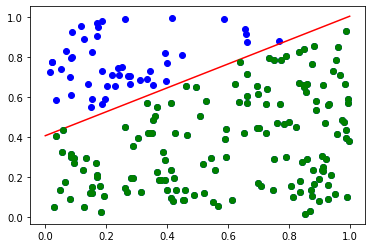

In [58]:
# Generate data points
N = 200
x = nr.rand(N, 2)

# Generate line
x_line = np.linspace(0, 1)
m = nr.rand()
c = nr.rand()
f = lambda x : m*x + c


plt.plot(x[:, 0], x[:, 1], 'bo')
plt.plot(x_line, f(x_line), 'r')


# Linearly separate the points by the line
y = np.zeros([N,1]);

for i in range(N):
    if(f(x[i,0])>x[i,1]):
        # Point is below line
        y[i] = 1;
        plt.plot(x[i,0],x[i,1],'go')
    else:
        # Point is above line
        y[i] = -1;
        
        
        

### Classifier: Signum Function
![alt text](signum_func.png "Title")

In [50]:
def sign(w, x):
    if ( np.dot(w[1:], x[0:]) + w[0] >= 0 ):
        return 1
    
    if ( np.dot(w[1:], x[0:]) + w[0] < 0 ):
        return -1

### Loss Function: Zero/One Loss
![alt text](zero_one_loss.png "Title")

In [51]:
def loss(x, y, w):
#     print(((np.dot(x, w[1:])+w[0])*y))
    if(((np.dot(x, w[1:])+w[0])*y)<=0):
        return 1
    else:
        return 0

### Cost Function
![alt text](cost_function.png "Title")

In [52]:
def cost(X, Y, w):
    n = len(X)
    error = 0
    for i, x in enumerate(X):
        error+=loss(X[i], Y[i], w)
    return error/n

## Algorithm

### Learning: Perceptron
![alt text](perceptron.png "Title")

In [53]:
def perceptron(X, Y, epoch):
    w = np.zeros(len(X[0])+1)
    #print("w = ",w)
    epochs = epoch
    errors = []

    for t in range(epochs):
        
        for i, x in enumerate(X):
            if (Y[i] != sign(w, x)):
                w[1:] = w[1:] + X[i]*Y[i]
                w[0] = w[0] + Y[i]
            errors.append(cost(X, Y, w))
                
        
    
    plt.plot(errors)
    plt.xlabel('Each update')
    plt.ylabel('Total Loss')
    plt.xlim(0, 210)

    return w

array([ 2.        ,  4.0598285 , -5.89343966])

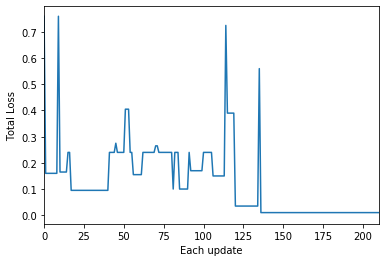

In [59]:
w = perceptron(x, y, 5)
w

## Check Prediction on Graph

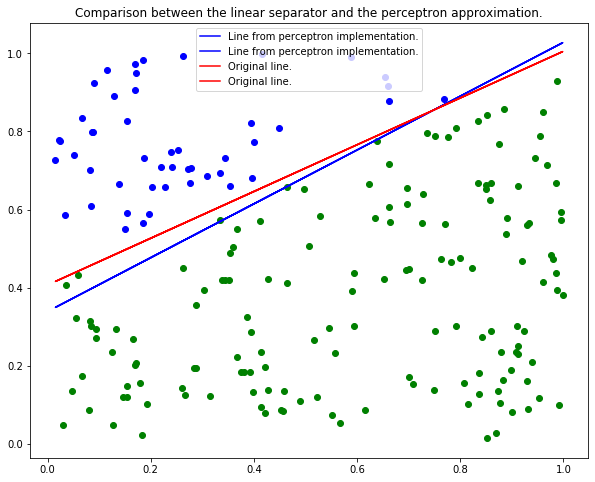

In [68]:
plt.rcParams["figure.figsize"] = (10,8)
# plot points on graph from given data

for i in range(N):
    if(y[i] == 1):
        plt.plot(x[i,0],x[i,1],'go')
    else:
        # Point is above line
        plt.plot(x[i,0],x[i,1], 'bo')

# plot w returned from Perceptron

# Using weights w to compute a,b for a line y=a*x+b
bnew = -w[0]/w[2];
anew = -w[1]/w[2];
y_func = lambda x: anew * x + bnew;

x_lin = np.linspace(0, 1)
plt.plot(x, y_func(x), 'b', label='Line from perceptron implementation.')
plt.plot(x, f(x), 'r', label='Original line.')


plt.title('Comparison between the linear separator and the perceptron approximation.')

plt.legend()